In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("scout_car.json" , lines = True) # lines = True parameter is essential %80 of json datasets.
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,...,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,...,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,...,[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,...,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,...,"[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,"16,200 km",05/2016,1 previous owner,NaN,...,"[\n, Technik & Sicherheit:, Xenon plus, Klimaa...",NaN,NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape # 15919 data and 54 columns.

(15919, 54)

In [4]:
df.columns # Oh we have 54 features. Probably some of them are irrelevant and should be dropped.

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [5]:
df.isna().sum() # Some features have too many nan values.

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [7]:
def dropAllNan():
    for i in df.columns:
        if df[i].isna().all():
            df.drop(i,axis = 1 , inplace = True)

dropAllNan() # Lets start. We dropped columns who have full nan values. 2 Cols dropped.

In [8]:
def dropMostNan():
    for i in df.columns:
        if df[i].isna().sum() > df.shape[0] * 0.9:
            df.drop(i,axis = 1 , inplace = True)
dropMostNan() # We also dropped columns who have % 90 of nan values. 6 cols dropped. We can't use that columns with very little data...

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   url                      15919 non-null  object
 1   make_model               15919 non-null  object
 2   short_description        15873 non-null  object
 3   body_type                15859 non-null  object
 4   price                    15919 non-null  int64 
 5   vat                      11406 non-null  object
 6   km                       15919 non-null  object
 7   registration             15919 non-null  object
 8   prev_owner               9091 non-null   object
 9   hp                       15919 non-null  object
 10  Type                     15917 non-null  object
 11  Previous Owners          9279 non-null   object
 12  Next Inspection          3535 non-null   object
 13  Inspection new           3932 non-null   object
 14  Warranty                 10499 non-nul

In [10]:
df.drop("make_model", axis = 1 , inplace = True) # We have make and model columns
df.drop("url", axis = 1 , inplace = True) # We cant use this feature.
df.drop("short_description", axis = 1 , inplace = True) # This feature also unnecessary for our analysis.
df.drop("Previous Owners", axis = 1 , inplace = True) # Too many irrelevant data. And have same feature named "prew_owner" 
df.drop("null", axis = 1 , inplace = True) # Full null values
df.drop("Non-smoking Vehicle", axis = 1 , inplace = True) # irrelevant datas

In [11]:
df.columns 

Index(['body_type', 'price', 'vat', 'km', 'registration', 'prev_owner', 'hp',
       'Type', 'Next Inspection', 'Inspection new', 'Warranty', 'Full Service',
       'Make', 'Model', 'Offer Number', 'First Registration', 'Body Color',
       'Paint Type', 'Body Color Original', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type',
       'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'description', 'Emission Label', 'Gears',
       'Country version'],
      dtype='object')

In [12]:
df.info() # km is object. I'll fix it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   body_type                15859 non-null  object
 1   price                    15919 non-null  int64 
 2   vat                      11406 non-null  object
 3   km                       15919 non-null  object
 4   registration             15919 non-null  object
 5   prev_owner               9091 non-null   object
 6   hp                       15919 non-null  object
 7   Type                     15917 non-null  object
 8   Next Inspection          3535 non-null   object
 9   Inspection new           3932 non-null   object
 10  Warranty                 10499 non-null  object
 11  Full Service             8215 non-null   object
 12  Make                     15919 non-null  object
 13  Model                    15919 non-null  object
 14  Offer Number             12744 non-nul

In [13]:
df["km"] # Some values "-"" and others have "," and "km"

0        56,013 km
1        80,000 km
2        83,450 km
3        73,000 km
4        16,200 km
           ...    
15914         - km
15915     9,900 km
15916        15 km
15917        10 km
15918         - km
Name: km, Length: 15919, dtype: object

In [14]:
df["km"] = df["km"].apply(lambda x : x.replace("," , "."))
df["km"] = df["km"].apply(lambda x : x.replace("-" , "0"))
df["km"] = df["km"].apply(lambda x : x.replace("km" , ""))
df.km = df.km.astype("float64")
df.km

0        56.013
1        80.000
2        83.450
3        73.000
4        16.200
          ...  
15914     0.000
15915     9.900
15916    15.000
15917    10.000
15918     0.000
Name: km, Length: 15919, dtype: float64

In [15]:
df.registration.value_counts() # 1597 -/- values. Lets do them 01/2020 and make their type as datetime64.

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [16]:
df["registration"] = df["registration"].apply(lambda x : x.replace("-/-","01/2020"))
df["registration"] = df["registration"].astype("datetime64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   body_type                15859 non-null  object        
 1   price                    15919 non-null  int64         
 2   vat                      11406 non-null  object        
 3   km                       15919 non-null  float64       
 4   registration             15919 non-null  datetime64[ns]
 5   prev_owner               9091 non-null   object        
 6   hp                       15919 non-null  object        
 7   Type                     15917 non-null  object        
 8   Next Inspection          3535 non-null   object        
 9   Inspection new           3932 non-null   object        
 10  Warranty                 10499 non-null  object        
 11  Full Service             8215 non-null   object        
 12  Make                     15919 n

In [17]:
df["prev_owner"].value_counts() # Looks good but have a little NaN values. And lets do others to number.

1 previous owner     8294
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [18]:
df["prev_owner"] = df["prev_owner"].dropna().apply(lambda x : x.replace(" previous owners" , ""))
df["prev_owner"] = df["prev_owner"].dropna().apply(lambda x : x.replace(" previous owner" , ""))
df["prev_owner"] = df["prev_owner"].astype("float64")
df["prev_owner"]

0        2.0
1        NaN
2        1.0
3        1.0
4        1.0
        ... 
15914    NaN
15915    1.0
15916    1.0
15917    NaN
15918    1.0
Name: prev_owner, Length: 15919, dtype: float64

In [19]:
df["hp"].value_counts() # Lets do it int column too.

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
84 kW        1
195 kW       1
44 kW        1
239 kW       1
9 kW         1
Name: hp, Length: 81, dtype: int64

In [20]:
df["hp"] = df["hp"].apply(lambda x : x.replace(" kW" , ""))
df["hp"] = df["hp"].apply(lambda x : x.replace("-" , "0"))
df.rename(columns = {"hp" : "hp(kW)"} , inplace= True)
df["hp(kW)"] = df["hp(kW)"].astype("int64")
df["hp(kW)"]


0         66
1        141
2         85
3         66
4         66
        ... 
15914    147
15915    165
15916    146
15917    147
15918    165
Name: hp(kW), Length: 15919, dtype: int64

In [21]:
df.head()

,body_type,price,vat,km,registration,prev_owner,hp(kW),Type,Next Inspection,Inspection new,...,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version
0,Sedans,15770,VAT deductible,56.013,2016-01-01,2.0,66,"[, Used, , Diesel (Particulate Filter)]","[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]",...,[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN
1,Sedans,14500,Price negotiable,80.000,2017-03-01,NaN,141,"[, Used, , Gasoline]",NaN,NaN,...,[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN
2,Sedans,14640,VAT deductible,83.450,2016-02-01,1.0,85,"[, Used, , Diesel (Particulate Filter)]",NaN,NaN,...,[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN
3,Sedans,14500,None,73.000,2016-08-01,1.0,66,"[, Used, , Diesel (Particulate Filter)]",NaN,NaN,...,[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...","[\nAudi A1: , - 1e eigenaar , - Perfecte staat...",NaN,[\n6\n],NaN
4,Sedans,16790,None,16.200,2016-05-01,1.0,66,"[, Used, , Diesel (Particulate Filter)]",NaN,"[\nYes\n, \n109 g CO2/km (comb)\n]",...,[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...","[\n, Technik & Sicherheit:, Xenon plus, Klimaa...",NaN,NaN,[\nGermany\n]


In [22]:
df.columns

Index(['body_type', 'price', 'vat', 'km', 'registration', 'prev_owner',
       'hp(kW)', 'Type', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Make', 'Model', 'Offer Number', 'First Registration',
       'Body Color', 'Paint Type', 'Body Color Original', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type',
       'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'description', 'Emission Label', 'Gears',
       'Country version'],
      dtype='object')

In [23]:
df["Type"] # Too dirty data. But we can get clear it.

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object

In [24]:
print(df["Type"][0])
print(df["Type"][0][1])
print(df["Type"][0][-1])
print(type(df["Type"][0])) # list type. But only 0.index.

['', 'Used', '', 'Diesel (Particulate Filter)']
Used
Diesel (Particulate Filter)
<class 'list'>


In [25]:
df["Type"] = df["Type"].dropna().apply(lambda x : x[1] + " - " + x[-1]) # Done. Looks perfect.
df.Type

0                       Used - Diesel (Particulate Filter)
1                                          Used - Gasoline
2                       Used - Diesel (Particulate Filter)
3                       Used - Diesel (Particulate Filter)
4                       Used - Diesel (Particulate Filter)
                               ...                        
15914                    New - Diesel (Particulate Filter)
15915    Used - Super 95 / Super Plus 98 (Particulate F...
15916                              Pre-registered - Diesel
15917                              Pre-registered - Diesel
15918                             Demonstration - Super 95
Name: Type, Length: 15919, dtype: object

In [26]:
print(df["Next Inspection"])
print(df["Next Inspection"].isna().sum())
print(df["Next Inspection"][0])
print(type(df["Next Inspection"])) # 12384 nan value. Only around 3800 non-null values. And dirty a bit. I think we can drop it.
df.drop("Next Inspection" , axis =1 , inplace = True)

0         [\n06/2021\n, \n99 g CO2/km (comb)\n]
1                                           NaN
2                                           NaN
3                                           NaN
4                                           NaN
                          ...                  
15914                                       NaN
15915    [\n01/2022\n, \n168 g CO2/km (comb)\n]
15916                                       NaN
15917                                       NaN
15918                                       NaN
Name: Next Inspection, Length: 15919, dtype: object
12384
['\n06/2021\n', '\n99 g CO2/km (comb)\n']
<class 'pandas.core.series.Series'>


In [27]:
print(df["Inspection new"])
print(df["Inspection new"].isna().sum()) # Same. 12000 nan values. Only around 4000 non-null values. And not critical feature. Let's drop
df.drop("Inspection new" , axis = 1 , inplace= True)

0                     [\nYes\n, \nEuro 6\n]
1                                       NaN
2                                       NaN
3                                       NaN
4        [\nYes\n, \n109 g CO2/km (comb)\n]
                        ...                
15914                                   NaN
15915                                   NaN
15916           [\nYes\n, \nEuro 6d-TEMP\n]
15917                                   NaN
15918    [\nYes\n, \n153 g CO2/km (comb)\n]
Name: Inspection new, Length: 15919, dtype: object
11987


In [28]:
print(df["Warranty"])
print(df["Warranty"].isna().sum())
print(df["Warranty"].value_counts())
df.drop("Warranty" , axis = 1 , inplace= True) # Too many irrelevant data. Lets drop this column.

0                 [\n, \n, \n4 (Green)\n]
1                                     NaN
2        [\n, \n, \n99 g CO2/km (comb)\n]
3                                     NaN
4                    [\n, \n, \nEuro 6\n]
                       ...               
15914                       \n24 months\n
15915                [\n, \n, \nEuro 6\n]
15916             [\n, \n, \n4 (Green)\n]
15917                                  \n
15918                                 NaN
Name: Warranty, Length: 15919, dtype: object
5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
[\n, \n, \n4 (Green)\n]                                                 

In [29]:
print(df["Full Service"])
print(df["Full Service"].isna().sum())
print(df["Full Service"].value_counts())
df.drop("Full Service" , axis = 1 , inplace= True) # Totally irrelevant datas.

0                                [\n, \n]
1                                     NaN
2                                     NaN
3        [\n, \n, \n99 g CO2/km (comb)\n]
4                 [\n, \n, \n4 (Green)\n]
                       ...               
15914                                 NaN
15915                                 NaN
15916                            [\n, \n]
15917                                 NaN
15918                                 NaN
Name: Full Service, Length: 15919, dtype: object
7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
\n                                                                                      

In [30]:
print(df["Make"]) 
print(df["Make"][0])
print(type(df["Make"][0]))
print(df["Make"].value_counts())

0           \nAudi\n
1           \nAudi\n
2           \nAudi\n
3           \nAudi\n
4           \nAudi\n
            ...     
15914    \nRenault\n
15915    \nRenault\n
15916    \nRenault\n
15917    \nRenault\n
15918    \nRenault\n
Name: Make, Length: 15919, dtype: object

Audi

<class 'str'>
\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64


In [31]:
df["Make"] = df["Make"].dropna().apply(lambda x: x.replace("\n" , ""))
df["Make"].value_counts() # Looks good.

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

In [32]:
print(df["Model"]) # Good.
print(df["Model"][0])
print(type(df["Model"][0]))
print(df["Model"].value_counts())

0            [\n, A1, \n]
1            [\n, A1, \n]
2            [\n, A1, \n]
3            [\n, A1, \n]
4            [\n, A1, \n]
               ...       
15914    [\n, Espace, \n]
15915    [\n, Espace, \n]
15916    [\n, Espace, \n]
15917    [\n, Espace, \n]
15918    [\n, Espace, \n]
Name: Model, Length: 15919, dtype: object
['\n', 'A1', '\n']
<class 'list'>
[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64


In [33]:
df["Model"] = df["Model"].apply( lambda x: x[1])
print(df.Model)
print(df.Model.value_counts()) # Now looks good.

0            A1
1            A1
2            A1
3            A1
4            A1
          ...  
15914    Espace
15915    Espace
15916    Espace
15917    Espace
15918    Espace
Name: Model, Length: 15919, dtype: object
A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64


In [34]:
df["Offer Number"] # Unneccessary colomn for our analysis.
df.drop("Offer Number" , axis = 1 , inplace=True)

In [35]:
print(df["First Registration"])
print(df["First Registration"].value_counts())
print(df["First Registration"].isna().sum())
print(df["First Registration"][0])
print(type(df["First Registration"][0])) # Important feature. Only 1597 nan value.

0        [\n, 2016, \n]
1        [\n, 2017, \n]
2        [\n, 2016, \n]
3        [\n, 2016, \n]
4        [\n, 2016, \n]
              ...      
15914               NaN
15915    [\n, 2019, \n]
15916    [\n, 2019, \n]
15917    [\n, 2019, \n]
15918    [\n, 2019, \n]
Name: First Registration, Length: 15919, dtype: object
[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
Name: First Registration, dtype: int64
1597
['\n', '2016', '\n']
<class 'list'>


In [36]:
df["First Registration"] = df["First Registration"].dropna().apply(lambda x : x[1])
print(df["First Registration"]) # Looks good.

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: object


In [37]:
print(df["Body Color"])
print(df["Body Color"].isna().sum())
print(df["Body Color"].value_counts()) 
print(df["Body Color"][0])
print(type(df["Body Color"][0])) # Important feature. Only 597 nan value. Lets clear it.

0        [\n, Black, \n]
1          [\n, Red, \n]
2        [\n, Black, \n]
3        [\n, Brown, \n]
4        [\n, Black, \n]
              ...       
15914     [\n, Grey, \n]
15915     [\n, Grey, \n]
15916    [\n, White, \n]
15917     [\n, Grey, \n]
15918     [\n, Grey, \n]
Name: Body Color, Length: 15919, dtype: object
597
[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64
['\n', 'Black', '\n']
<class 'list'>


In [38]:
df["Body Color"] = df["Body Color"].dropna().apply(lambda x: x[1])
print(df["Body Color"])
print(df["Body Color"].value_counts()) # Looks clear.

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body Color, Length: 15919, dtype: object
Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64


In [39]:
print((df["Paint Type"]))
print((df["Paint Type"].isna().sum()))
print((df["Paint Type"].value_counts()))
print((df["Paint Type"][0]))
print((type(df["Paint Type"][0])))
print((type(df["Paint Type"]))) # 5772 nan value. But 10000 non-null value. And important feature. So I'll clear it.

0        [\nMetallic\n]
1                   NaN
2        [\nMetallic\n]
3        [\nMetallic\n]
4        [\nMetallic\n]
              ...      
15914    [\nMetallic\n]
15915    [\nMetallic\n]
15916               NaN
15917               NaN
15918    [\nMetallic\n]
Name: Paint Type, Length: 15919, dtype: object
5772
[\nMetallic\n]       9794
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64
['\nMetallic\n']
<class 'list'>
<class 'pandas.core.series.Series'>


In [40]:
df["Paint Type"] = df["Paint Type"].dropna().apply(lambda x : x[0].replace("\n",""))
print(df["Paint Type"])
print(df["Paint Type"].value_counts()) # Looks clear.

0        Metallic
1             NaN
2        Metallic
3        Metallic
4        Metallic
           ...   
15914    Metallic
15915    Metallic
15916         NaN
15917         NaN
15918    Metallic
Name: Paint Type, Length: 15919, dtype: object
Metallic       9794
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64


In [41]:
df.columns

Index(['body_type', 'price', 'vat', 'km', 'registration', 'prev_owner',
       'hp(kW)', 'Type', 'Make', 'Model', 'First Registration', 'Body Color',
       'Paint Type', 'Body Color Original', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type',
       'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel',
       'Consumption', 'CO2 Emission', 'Emission Class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'description', 'Emission Label', 'Gears',
       'Country version'],
      dtype='object')

In [42]:
print(df["Body Color Original"])
print(df["Body Color Original"].isna().sum())
print(df["Body Color Original"].value_counts())
print(df["Body Color Original"][0])
print(type(df["Body Color Original"][0])) # Important feature. 3759 nan values. I'll clear others.

0                 [\nMythosschwarz\n]
1                                 NaN
2        [\nmythosschwarz metallic\n]
3                                 NaN
4        [\nMythosschwarz Metallic\n]
                     ...             
15914              [\nGrigio scuro\n]
15915       [\nStahl-Grau Metallic\n]
15916               [\narktis-weiß\n]
15917                    [\nGrigio\n]
15918    [\nTitanium-Grau Metallic\n]
Name: Body Color Original, Length: 15919, dtype: object
3759
[\nOnyx Schwarz\n]                     338
[\nBianco\n]                           282
[\nMythosschwarz Metallic\n]           238
[\nBrillantschwarz\n]                  216
[\nGris\n]                             204
                                      ... 
[\nRouge-Braun (G0Y)\n]                  1
[\nVARI COLRI DISPONIBILI\n]             1
[\nKokosnussbraun Metallic\n]            1
[\nFarbe frei wählbar\n]                 1
[\nPerlmutt-Weiß Metallic (Weiß)\n]      1
Name: Body Color Original, Length: 1927, dtype: 

In [43]:
#df["Body Color Original"] = df["Body Color Original"].dropna().apply(lambda x: x[0].replace("\n" , ""))
print(df["Body Color Original"])
print(df["Body Color Original"].value_counts()) # Looks clear.

0                 [\nMythosschwarz\n]
1                                 NaN
2        [\nmythosschwarz metallic\n]
3                                 NaN
4        [\nMythosschwarz Metallic\n]
                     ...             
15914              [\nGrigio scuro\n]
15915       [\nStahl-Grau Metallic\n]
15916               [\narktis-weiß\n]
15917                    [\nGrigio\n]
15918    [\nTitanium-Grau Metallic\n]
Name: Body Color Original, Length: 15919, dtype: object
[\nOnyx Schwarz\n]                     338
[\nBianco\n]                           282
[\nMythosschwarz Metallic\n]           238
[\nBrillantschwarz\n]                  216
[\nGris\n]                             204
                                      ... 
[\nRouge-Braun (G0Y)\n]                  1
[\nVARI COLRI DISPONIBILI\n]             1
[\nKokosnussbraun Metallic\n]            1
[\nFarbe frei wählbar\n]                 1
[\nPerlmutt-Weiß Metallic (Weiß)\n]      1
Name: Body Color Original, Length: 1927, dtype: int64

In [44]:
print(df["Upholstery"])
print(df["Upholstery"].isna().sum())
print(df["Upholstery"].value_counts())
print(df["Upholstery"][0])
print(type(df["Upholstery"][0]))
print((df["Upholstery"][0])) # Important feature. 3720 nan values. I'll clear that column.

0               [\nCloth, Black\n]
1                [\nCloth, Grey\n]
2               [\nCloth, Black\n]
3                              NaN
4               [\nCloth, Black\n]
                   ...            
15914                          NaN
15915                  [\nCloth\n]
15916    [\nFull leather, Black\n]
15917           [\nPart leather\n]
15918    [\nFull leather, Brown\n]
Name: Upholstery, Length: 15919, dtype: object
3720
[\nCloth, Black\n]           5821
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nPart leather, Grey\n]      116
[\nFull leather, Brown\n]     116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Ot

In [45]:
df["Upholstery"] = df["Upholstery"].dropna().apply(lambda x: x[0].replace("\n" , ""))
df["Upholstery"] = df["Upholstery"].dropna().apply(lambda x: x.replace("\n" , ""))
print(df["Upholstery"])
print(df["Upholstery"].value_counts()) # Looks clear now.

0               Cloth, Black
1                Cloth, Grey
2               Cloth, Black
3                        NaN
4               Cloth, Black
                ...         
15914                    NaN
15915                  Cloth
15916    Full leather, Black
15917           Part leather
15918    Full leather, Brown
Name: Upholstery, Length: 15919, dtype: object
Cloth, Black           5821
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Part leather, Grey      116
Full leather, Brown     116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Full leather, Beige      36
Velour, Black            36
Cloth, Brown      

In [46]:
print(df["Body"])
print(df["Body"].isna().sum())
print(df["Body"].value_counts())
print(df["Body"][0])
print(type(df["Body"][0])) # Important feature. Only 60 nan value. I'll clear others.

0        [\n, Sedans, \n]
1        [\n, Sedans, \n]
2        [\n, Sedans, \n]
3        [\n, Sedans, \n]
4        [\n, Sedans, \n]
               ...       
15914       [\n, Van, \n]
15915       [\n, Van, \n]
15916       [\n, Van, \n]
15917       [\n, Van, \n]
15918       [\n, Van, \n]
Name: Body, Length: 15919, dtype: object
60
[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64
['\n', 'Sedans', '\n']
<class 'list'>


In [47]:
df["Body"] = df["Body"].dropna().apply(lambda x : x[1])
print(df["Body"])
print(df["Body"].value_counts()) # Looks clear.

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: Body, Length: 15919, dtype: object
Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: Body, dtype: int64


In [48]:
print(df["Nr. of Doors"])
print(df["Nr. of Doors"].isna().sum())
print(df["Nr. of Doors"].value_counts())
print(df["Nr. of Doors"][0])
print(type(df["Nr. of Doors"][0])) # Only 212 nan value and important feature. I'll clear it.

0        [\n5\n]
1        [\n3\n]
2        [\n4\n]
3        [\n3\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n5\n]
15917    [\n5\n]
15918    [\n5\n]
Name: Nr. of Doors, Length: 15919, dtype: object
212
[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
[\n1\n]        1
[\n7\n]        1
Name: Nr. of Doors, dtype: int64
['\n5\n']
<class 'list'>


In [49]:
df["Nr. of Doors"] = df["Nr. of Doors"].dropna().apply(lambda x : x[0].replace("\n" , ""))
print(df["Nr. of Doors"])
print(df["Nr. of Doors"].value_counts()) # Looks good.

0        5
1        3
2        4
3        3
4        5
        ..
15914    5
15915    5
15916    5
15917    5
15918    5
Name: Nr. of Doors, Length: 15919, dtype: object
5    11575
4     3079
3      832
2      219
1        1
7        1
Name: Nr. of Doors, dtype: int64


In [50]:
print(df["Nr. of Seats"])
print(df["Nr. of Seats"].isna().sum())
print(df["Nr. of Seats"].value_counts())
print(df["Nr. of Seats"][0])
print(type(df["Nr. of Seats"][0])) # Only 977 nan values. Important feature.

0        [\n5\n]
1        [\n4\n]
2        [\n4\n]
3        [\n4\n]
4        [\n5\n]
          ...   
15914    [\n5\n]
15915    [\n5\n]
15916    [\n7\n]
15917    [\n7\n]
15918    [\n5\n]
Name: Nr. of Seats, Length: 15919, dtype: object
977
[\n5\n]    13336
[\n4\n]     1125
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64
['\n5\n']
<class 'list'>


In [51]:
df["Nr. of Seats"] = df["Nr. of Seats"].dropna().apply(lambda x : x[0].replace("\n" , ""))
df["Nr. of Seats"] = df["Nr. of Seats"].astype("float64")
print(df["Nr. of Seats"])
print(df["Nr. of Seats"].value_counts()) # Looks good.

0        5.0
1        4.0
2        4.0
3        4.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    7.0
15917    7.0
15918    5.0
Name: Nr. of Seats, Length: 15919, dtype: float64
5.0    13336
4.0     1125
7.0      362
2.0      116
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64


In [52]:
df.drop("Model Code", axis = 1 , inplace = True) # Unnecessary feature.

In [53]:
print(df["Gearing Type"])
print(df["Gearing Type"].isna().sum())
print(df["Gearing Type"].value_counts())
print(df["Gearing Type"][0])
print(type(df["Gearing Type"][0])) # 0 nan value.

0        [\n, Automatic, \n]
1        [\n, Automatic, \n]
2        [\n, Automatic, \n]
3        [\n, Automatic, \n]
4        [\n, Automatic, \n]
                ...         
15914    [\n, Automatic, \n]
15915    [\n, Automatic, \n]
15916    [\n, Automatic, \n]
15917    [\n, Automatic, \n]
15918    [\n, Automatic, \n]
Name: Gearing Type, Length: 15919, dtype: object
0
[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64
['\n', 'Automatic', '\n']
<class 'list'>


In [54]:
df["Gearing Type"] = df["Gearing Type"].apply(lambda x: x[1])
print(df["Gearing Type"])
print(df["Gearing Type"].value_counts()) # Looks well.

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15914    Automatic
15915    Automatic
15916    Automatic
15917    Automatic
15918    Automatic
Name: Gearing Type, Length: 15919, dtype: object
Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64


In [55]:
print(df["Displacement"])
print(df["Displacement"].isna().sum())
print(df["Displacement"].value_counts())
print(df["Displacement"][0])
print(type(df["Displacement"][0])) # 496 nan value.

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15919, dtype: object
496
[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
                  ... 
[\n122 cc\n]         1
[\n1,198 cc\n]       1
[\n1,195 cc\n]       1
[\n2,967 cc\n]       1
[\n1,800 cc\n]       1
Name: Displacement, Length: 77, dtype: int64
['\n1,422 cc\n']
<class 'list'>


In [56]:
df["Displacement"] = df["Displacement"].dropna().apply(lambda x : x[0].replace("\n1," , ""))
df["Displacement"] = df["Displacement"].dropna().apply(lambda x : x.replace(" cc\n" , ""))
df["Displacement"] = df["Displacement"].dropna().apply(lambda x : x.replace("\n" , ""))
df["Displacement"] = df["Displacement"].dropna().apply(lambda x : x.replace("\n1" , ""))
df["Displacement"] = df["Displacement"].dropna().apply(lambda x : x.replace("\n2" , ""))
df["Displacement"] = df["Displacement"].dropna().apply(lambda x : x.replace("," , ""))
print(df["Displacement"])
print(df["Displacement"].value_counts())
print(df["Displacement"].unique()) # Looks perfect !

0        422
1        798
2        598
3        422
4        422
        ... 
15914    997
15915    798
15916    997
15917    997
15918    798
Name: Displacement, Length: 15919, dtype: object
598     4761
999     2438
398     1314
399      749
229      677
        ... 
390        1
198        1
195        1
2967       1
800        1
Name: Displacement, Length: 74, dtype: int64
['422' '798' '598' '999' '395' '929' nan '596' '600' '000' '984' '498'
 '197' '995' '998' '968' '400' '2000' '568' '896' '2480' '499' '495' '398'
 '584' '997' '399' '364' '490' '996' '696' '686' '396' '15898' '139' '368'
 '140' '397' '248' '229' '300' '200' '973' '239' '350' '369' '390' '122'
 '198' '195' '956' '2' '2967' '856' '16000' '500' '496' '533' '1' '599'
 '461' '618' '149' '199' '898' '890' '900' '54' '100' '333' '899' '589'
 '580' '160' '800']


In [57]:
def statusColList(col):
    print(df[col])
    print(df[col].isna().sum())
    print(df[col].value_counts())
    print(df[col][0])
    print(type(df[col][0]))

In [58]:
def afterEdit(col):
    print(df[col])
    print(df[col].unique())
    print(df[col].value_counts())
    print(df[col].isna().sum())
    

In [59]:
statusColList("Cylinders") # 5680 nan values. But important feature.

0        [\n3\n]
1        [\n4\n]
2            NaN
3        [\n3\n]
4        [\n3\n]
          ...   
15914    [\n4\n]
15915    [\n4\n]
15916    [\n4\n]
15917    [\n4\n]
15918    [\n4\n]
Name: Cylinders, Length: 15919, dtype: object
5680
[\n4\n]    8105
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64
['\n3\n']
<class 'list'>


In [60]:
df["Cylinders"] = df["Cylinders"].dropna().apply(lambda x : x[0].replace("\n" , ""))
afterEdit("Cylinders") # Look good.

0          3
1          4
2        NaN
3          3
4          3
        ... 
15914      4
15915      4
15916      4
15917      4
15918      4
Name: Cylinders, Length: 15919, dtype: object
['3' '4' nan '8' '5' '1' '6' '2']
4    8105
3    2104
5      22
6       3
8       2
2       2
1       1
Name: Cylinders, dtype: int64
5680


In [61]:
statusColList("Weight")

0        [\n1,220 kg\n]
1        [\n1,255 kg\n]
2                   NaN
3        [\n1,195 kg\n]
4                   NaN
              ...      
15914    [\n1,758 kg\n]
15915    [\n1,708 kg\n]
15916               NaN
15917    [\n1,758 kg\n]
15918    [\n1,685 kg\n]
Name: Weight, Length: 15919, dtype: object
6974
[\n1,163 kg\n]    574
[\n1,360 kg\n]    356
[\n1,165 kg\n]    301
[\n1,335 kg\n]    242
[\n1,135 kg\n]    213
                 ... 
[\n1,331 kg\n]      1
[\n1,132 kg\n]      1
[\n1,252 kg\n]      1
[\n1,792 kg\n]      1
[\n2,037 kg\n]      1
Name: Weight, Length: 434, dtype: int64
['\n1,220 kg\n']
<class 'list'>


In [62]:
df["Weight"] = df["Weight"].dropna().apply(lambda x : x[0].replace("\n1," , ""))
df["Weight"] = df["Weight"].dropna().apply(lambda x : x.replace("\n2," , ""))
df["Weight"] = df["Weight"].dropna().apply(lambda x : x.replace(" kg\n" , ""))
afterEdit("Weight") # Looking good.

0        220
1        255
2        NaN
3        195
4        NaN
        ... 
15914    758
15915    708
15916    NaN
15917    758
15918    685
Name: Weight, Length: 15919, dtype: object
['220' '255' nan '195' '275' '250' '135' '175' '065' '180' '190' '630'
 '165' '205' '110' '675' '720' '625' '215' '200' '115' '665' '040' '660'
 '225' '090' '217' '610' '580' '155' '140' '230' '157' '120' '792' '635'
 '210' '640' '060' '105' '285' '500' '235' '088' '097' '125' '240' '695'
 '280' '035' '010' '223' '530' '540' '134' '600' '705' '650' '565' '145'
 '265' '\n102' '263' '485' '094' '345' '130' '680' '166' '114' '260' '173'
 '100' '550' '335' '207' '179' '176' '169' '182' '178' '171' '144' '655'
 '136' '138' '133' '645' '181' '185' '206' '350' '150' '147' '146' '141'
 '156' '142' '118' '470' '355' '360' '305' '525' '395' '400' '880' '330'
 '365' '041' '420' '320' '905' '300' '840' '845' '850' '890' '340' '415'
 '270' '385' '390' '310' '325' '322' '465' '765' '315' '410' '800' '380'
 '865' '870

In [63]:
statusColList("Drive chain")

0        [\nfront\n]
1        [\nfront\n]
2        [\nfront\n]
3                NaN
4        [\nfront\n]
            ...     
15914    [\nfront\n]
15915    [\nfront\n]
15916    [\nfront\n]
15917    [\nfront\n]
15918      [\n4WD\n]
Name: Drive chain, Length: 15919, dtype: object
6858
[\nfront\n]    8886
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64
['\nfront\n']
<class 'list'>


In [64]:
df["Drive chain"] = df["Drive chain"].dropna().apply(lambda x : x[0].replace("\n" , ""))
afterEdit("Drive chain") # Looks okay.

0        front
1        front
2        front
3          NaN
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: Drive chain, Length: 15919, dtype: object
['front' nan '4WD' 'rear']
front    8886
4WD       171
rear        4
Name: Drive chain, dtype: int64
6858


In [65]:
df.columns

Index(['body_type', 'price', 'vat', 'km', 'registration', 'prev_owner',
       'hp(kW)', 'Type', 'Make', 'Model', 'First Registration', 'Body Color',
       'Paint Type', 'Body Color Original', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version'],
      dtype='object')

In [66]:
statusColList("Fuel")

0                    [\n, Diesel (Particulate Filter), \n]
1                                       [\n, Gasoline, \n]
2                    [\n, Diesel (Particulate Filter), \n]
3                    [\n, Diesel (Particulate Filter), \n]
4                    [\n, Diesel (Particulate Filter), \n]
                               ...                        
15914                [\n, Diesel (Particulate Filter), \n]
15915    [\n, Super 95 / Super Plus 98 (Particulate Fil...
15916                                     [\n, Diesel, \n]
15917                                     [\n, Diesel, \n]
15918                                   [\n, Super 95, \n]
Name: Fuel, Length: 15919, dtype: object
0
[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                          

In [67]:
df["Fuel"] = df["Fuel"].apply(lambda x : x[1])
afterEdit("Fuel")

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: Fuel, Length: 15919, dtype: object
['Diesel (Particulate Filter)' 'Gasoline' 'Super 95' 'Regular/Benzine 91'
 'Diesel'
 'Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super 95 / Super E10 95 / Super Plus E10 98'
 'Super E10 95' 'Super 95 (Particulate Filter)'
 'Super 95 / Regular/Benzine 91'
 'Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98'
 'Super E10 95 / 

In [68]:
#statusColList("Consumption") # Buna dönücem sonra.

In [69]:
#print(df["Consumption"][0][0][0].replace(" l/100 km (comb)" , ""))
#print(df["Consumption"][0][1][0].replace(" l/100 km (city)" , ""))
#print(df["Consumption"][0][2][0].replace(" l/100 km (country)" , ""))

In [70]:
#float(df["Consumption"][0][0][0].replace(" l/100 km (comb)" , ""))

In [71]:
#df["Consumption(comb)"] = df["Consumption"].dropna().apply(lambda x : x[0][0].replace(" l/100 km (comb)", "") if (type(x[0][0]) == str) else x) # Not working yet. I'll fix it later.
#df["Consumption(comb)"]

In [72]:
#df["Consumption"] = df["Consumption"].dropna().apply(lambda x: x[:][0] + x[:][1] + x[:][2])
#df["Consumption"] # Not good enough.

In [73]:
df.columns

Index(['body_type', 'price', 'vat', 'km', 'registration', 'prev_owner',
       'hp(kW)', 'Type', 'Make', 'Model', 'First Registration', 'Body Color',
       'Paint Type', 'Body Color Original', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version'],
      dtype='object')

In [74]:
statusColList("CO2 Emission")

0         [\n99 g CO2/km (comb)\n]
1        [\n129 g CO2/km (comb)\n]
2         [\n99 g CO2/km (comb)\n]
3         [\n99 g CO2/km (comb)\n]
4        [\n109 g CO2/km (comb)\n]
                   ...            
15914    [\n139 g CO2/km (comb)\n]
15915    [\n168 g CO2/km (comb)\n]
15916    [\n139 g CO2/km (comb)\n]
15917    [\n139 g CO2/km (comb)\n]
15918    [\n153 g CO2/km (comb)\n]
Name: CO2 Emission, Length: 15919, dtype: object
1808
[\n120 g CO2/km (comb)\n]      740
[[], [], []]                   628
[\n99 g CO2/km (comb)\n]       545
[\n97 g CO2/km (comb)\n]       537
[\n104 g CO2/km (comb)\n]      501
                              ... 
[\n14 g CO2/km (comb)\n]         1
[\n1,060 g CO2/km (comb)\n]      1
[\n51 g CO2/km (comb)\n]         1
[\n165 g CO2/km (comb)\n]        1
[\n193 g CO2/km (comb)\n]        1
Name: CO2 Emission, Length: 123, dtype: int64
['\n99 g CO2/km (comb)\n']
<class 'list'>


In [75]:
df["CO2 Emission"][0][0]

'\n99 g CO2/km (comb)\n'

In [76]:
df["CO2 Emission"] = df["CO2 Emission"].dropna().apply(lambda x : x[0].replace("\n" , "") if (type(x[0]) == str) else np.NaN)
df["CO2 Emission"] = df["CO2 Emission"].dropna().apply(lambda x : x.replace(" g CO2/km (comb)" , ""))
df["CO2 Emission"] = df["CO2 Emission"].dropna().apply(lambda x : np.NaN if len(x) > 3 else x) 
df["CO2 Emission"] = df["CO2 Emission"].dropna().apply(lambda x : np.NaN if len(str(x)) == 1 else x) 
df["CO2 Emission"].rename({"CO2 Emission" : "CO2 Emission (g/km)"})
afterEdit("CO2 Emission") # Not the best. I'll check it later again.

0         99
1        129
2         99
3         99
4        109
        ... 
15914    139
15915    168
15916    139
15917    139
15918    153
Name: CO2 Emission, Length: 15919, dtype: object
['99' '129' '109' '92' '98' '97' nan '105' '112' '103' '102' '95' '104'
 '91' '94' '117' '123' '106' '108' '121' '107' '101' '113' '137' '100'
 '116' '114' '118' '331' '115' '119' '90' '136' '134' '110' '111' '120'
 '89' '142' '126' '122' '128' '127' '138' '130' '125' '85' '124' '152'
 '88' '189' '194' '149' '153' '188' '36' '96' '990' '146' '135' '158'
 '141' '172' '154' '150' '167' '174' '93' '133' '131' '145' '147' '156'
 '87' '148' '139' '151' '144' '168' '160' '170' '80' '132' '155' '14'
 '159' '143' '140' '82' '84' '165' '51' '157' '169' '166' '253' '164'
 '175' '190' '161' '239' '197' '184' '199' '187' '181' '186' '177' '180'
 '162' '45' '171' '183' '191' '193']
120    740
99     545
97     537
104    501
102    477
      ... 
331      1
14       1
51       1
165      1
193      1
Name: CO2

In [77]:
statusColList("Emission Class")

0              [\nEuro 6\n]
1              [\nEuro 6\n]
2              [\nEuro 6\n]
3              [\nEuro 6\n]
4              [\nEuro 6\n]
                ...        
15914                   NaN
15915                   NaN
15916    [\nEuro 6d-TEMP\n]
15917          [\nEuro 6\n]
15918          [\nEuro 6\n]
Name: Emission Class, Length: 15919, dtype: object
3021
[\nEuro 6\n]          10139
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64
['\nEuro 6\n']
<class 'list'>


In [78]:
df["Emission Class"] = df["Emission Class"].dropna().apply(lambda x : x[0].replace("\n" , "") if type(x[0]) == str else np.NaN)
afterEdit("Emission Class") # Looks good.


0              Euro 6
1              Euro 6
2              Euro 6
3              Euro 6
4              Euro 6
             ...     
15914             NaN
15915             NaN
15916    Euro 6d-TEMP
15917          Euro 6
15918          Euro 6
Name: Emission Class, Length: 15919, dtype: object
['Euro 6' nan 'Euro 5' 'Euro 6d-TEMP' 'Euro 6c' 'Euro 4' 'Euro 6d']
Euro 6          10139
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission Class, dtype: int64
3628


In [79]:
statusColList("\nComfort & Convenience\n") # We cant analyse something with this feature.Drop !
df.drop("\nComfort & Convenience\n", axis = 1 , inplace = True)
df.columns

0        [Air conditioning, Armrest, Automatic climate ...
1        [Air conditioning, Automatic climate control, ...
2        [Air conditioning, Cruise control, Electrical ...
3        [Air suspension, Armrest, Auxiliary heating, E...
4        [Air conditioning, Armrest, Automatic climate ...
                               ...                        
15914    [Air conditioning, Automatic climate control, ...
15915    [Air conditioning, Automatic climate control, ...
15916    [Air conditioning, Armrest, Automatic climate ...
15917    [Air conditioning, Automatic climate control, ...
15918    [Air conditioning, Automatic climate control, ...
Name: \nComfort & Convenience\n, Length: 15919, dtype: object
920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                      

Index(['body_type', 'price', 'vat', 'km', 'registration', 'prev_owner',
       'hp(kW)', 'Type', 'Make', 'Model', 'First Registration', 'Body Color',
       'Paint Type', 'Body Color Original', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nEntertainment & Media\n',
       '\nExtras\n', '\nSafety & Security\n', 'description', 'Emission Label',
       'Gears', 'Country version'],
      dtype='object')

In [80]:
statusColList("\nEntertainment & Media\n") # Same. Drop.
df.drop("\nEntertainment & Media\n", axis = 1 , inplace = True)
df.drop("\nExtras\n", axis = 1 , inplace = True)
df.drop("\nSafety & Security\n", axis = 1 , inplace = True)
df.drop("description", axis = 1 , inplace = True)

0        [Bluetooth, Hands-free equipment, On-board com...
1        [Bluetooth, Hands-free equipment, On-board com...
2                                 [MP3, On-board computer]
3        [Bluetooth, CD player, Hands-free equipment, M...
4        [Bluetooth, CD player, Hands-free equipment, M...
                               ...                        
15914    [Bluetooth, Digital radio, Hands-free equipmen...
15915    [Bluetooth, Digital radio, Hands-free equipmen...
15916    [Bluetooth, Hands-free equipment, On-board com...
15917               [Bluetooth, Digital radio, Radio, USB]
15918                                                [USB]
Name: \nEntertainment & Media\n, Length: 15919, dtype: object
1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                         1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                     982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]          783
[O

In [81]:
statusColList("Emission Label") # Too much nan. And not too important. Drop
df.drop("Emission Label", axis = 1 , inplace = True)

0                    NaN
1        [\n4 (Green)\n]
2        [\n4 (Green)\n]
3                    NaN
4                    NaN
              ...       
15914                NaN
15915                NaN
15916                NaN
15917                NaN
15918    [\n4 (Green)\n]
Name: Emission Label, Length: 15919, dtype: object
11934
[\n4 (Green)\n]         3553
[\n1 (No sticker)\n]     381
[[], [], []]              40
[\n5 (Blue)\n]             8
[\n3 (Yellow)\n]           2
[\n2 (Red)\n]              1
Name: Emission Label, dtype: int64
nan
<class 'float'>


In [82]:
statusColList("Gears")

0            NaN
1        [\n7\n]
2            NaN
3        [\n6\n]
4            NaN
          ...   
15914    [\n6\n]
15915    [\n7\n]
15916    [\n6\n]
15917    [\n6\n]
15918        NaN
Name: Gears, Length: 15919, dtype: object
4712
[\n6\n]     5822
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: Gears, dtype: int64
nan
<class 'float'>


In [83]:
df["Gears"] = df["Gears"].dropna().apply(lambda x : x[0].replace("\n" , ""))
df["Gears"] = df["Gears"].dropna().apply(lambda x : x[0] if len(x) == 2 else x)
afterEdit("Gears") # That's it. Nice !

0        NaN
1          7
2        NaN
3          6
4        NaN
        ... 
15914      6
15915      7
15916      6
15917      6
15918    NaN
Name: Gears, Length: 15919, dtype: object
[nan '7' '6' '5' '8' '1' '2' '9' '3' '4']
6    5822
5    3240
7    1908
8     224
9       6
1       2
3       2
4       2
2       1
Name: Gears, dtype: int64
4712


In [84]:
statusColList("Country version")

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4        [\nGermany\n]
             ...      
15914              NaN
15915    [\nGermany\n]
15916    [\nAustria\n]
15917              NaN
15918    [\nGermany\n]
Name: Country version, Length: 15919, dtype: object
8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: Country version, 

In [85]:
df["Country version"] = df["Country version"].dropna().apply(lambda x: x[0].replace("\n" , ""))
afterEdit("Country version") # Looking good.

0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: Country version, Length: 15919, dtype: object
[nan 'Germany' 'Italy' 'Belgium' 'Netherlands' 'Spain' 'European Union'
 'Switzerland' 'Austria' 'Luxembourg' 'France' 'Denmark' 'Poland'
 'Romania' 'Slovakia' 'Sweden' 'Czech Republic' 'Hungary' 'Slovenia'
 'Croatia' 'Egypt' 'Serbia' 'Bulgaria' 'Japan']
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1


In [86]:
df.head()

,body_type,price,vat,km,registration,prev_owner,hp(kW),Type,Make,Model,...,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Gears,Country version
0,Sedans,15770,VAT deductible,56.013,2016-01-01,2.0,66,Used - Diesel (Particulate Filter),Audi,A1,...,422,3,220,front,Diesel (Particulate Filter),"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,Euro 6,NaN,NaN
1,Sedans,14500,Price negotiable,80.000,2017-03-01,NaN,141,Used - Gasoline,Audi,A1,...,798,4,255,front,Gasoline,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",129,Euro 6,7,NaN
2,Sedans,14640,VAT deductible,83.450,2016-02-01,1.0,85,Used - Diesel (Particulate Filter),Audi,A1,...,598,NaN,NaN,front,Diesel (Particulate Filter),"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",99,Euro 6,NaN,NaN
3,Sedans,14500,None,73.000,2016-08-01,1.0,66,Used - Diesel (Particulate Filter),Audi,A1,...,422,3,195,NaN,Diesel (Particulate Filter),"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99,Euro 6,6,NaN
4,Sedans,16790,None,16.200,2016-05-01,1.0,66,Used - Diesel (Particulate Filter),Audi,A1,...,422,3,NaN,front,Diesel (Particulate Filter),"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",109,Euro 6,NaN,Germany


In [87]:
df.shape

(15919, 29)

In [88]:
df.columns

Index(['body_type', 'price', 'vat', 'km', 'registration', 'prev_owner',
       'hp(kW)', 'Type', 'Make', 'Model', 'First Registration', 'Body Color',
       'Paint Type', 'Body Color Original', 'Upholstery', 'Body',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', 'Gears', 'Country version'],
      dtype='object')

In [89]:
df.isna().sum()

body_type                60
price                     0
vat                    4513
km                        0
registration              0
prev_owner             6828
hp(kW)                    0
Type                      2
Make                      0
Model                     0
First Registration     1597
Body Color              597
Paint Type             5772
Body Color Original    3759
Upholstery             3720
Body                     60
Nr. of Doors            212
Nr. of Seats            977
Gearing Type              0
Displacement            496
Cylinders              5680
Weight                 6974
Drive chain            6858
Fuel                      0
Consumption            1906
CO2 Emission           2449
Emission Class         3628
Gears                  4712
Country version        8333
dtype: int64

# Cleaning Done.(Only Consumption feature !) Now look for dtypes.

In [90]:
df.dtypes

body_type                      object
price                           int64
vat                            object
km                            float64
registration           datetime64[ns]
prev_owner                    float64
hp(kW)                          int64
Type                           object
Make                           object
Model                          object
First Registration             object
Body Color                     object
Paint Type                     object
Body Color Original            object
Upholstery                     object
Body                           object
Nr. of Doors                   object
Nr. of Seats                  float64
Gearing Type                   object
Displacement                   object
Cylinders                      object
Weight                         object
Drive chain                    object
Fuel                           object
Consumption                    object
CO2 Emission                   object
Emission Cla

In [91]:
df["Nr. of Doors"] = df["Nr. of Doors"].astype("float64")
df.Displacement = df.Displacement.astype("float64")
df.Cylinders = df.Cylinders.astype("float64")
df.Weight = df.Weight.astype("float64")
df["CO2 Emission"] = df["CO2 Emission"].astype("float64")
df["Gears"] = df["Gears"].astype("float64")

In [100]:
df.shape

(15919, 29)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   body_type            15859 non-null  object        
 1   price                15919 non-null  int64         
 2   vat                  11406 non-null  object        
 3   km                   15919 non-null  float64       
 4   registration         15919 non-null  datetime64[ns]
 5   prev_owner           9091 non-null   float64       
 6   hp(kW)               15919 non-null  int64         
 7   Type                 15917 non-null  object        
 8   Make                 15919 non-null  object        
 9   Model                15919 non-null  object        
 10  First Registration   14322 non-null  object        
 11  Body Color           15322 non-null  object        
 12  Paint Type           10147 non-null  object        
 13  Body Color Original  12160 non-

In [93]:
df.head()

,body_type,price,vat,km,registration,prev_owner,hp(kW),Type,Make,Model,...,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,Gears,Country version
0,Sedans,15770,VAT deductible,56.013,2016-01-01,2.0,66,Used - Diesel (Particulate Filter),Audi,A1,...,422.0,3.0,220.0,front,Diesel (Particulate Filter),"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99.0,Euro 6,NaN,NaN
1,Sedans,14500,Price negotiable,80.000,2017-03-01,NaN,141,Used - Gasoline,Audi,A1,...,798.0,4.0,255.0,front,Gasoline,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",129.0,Euro 6,7.0,NaN
2,Sedans,14640,VAT deductible,83.450,2016-02-01,1.0,85,Used - Diesel (Particulate Filter),Audi,A1,...,598.0,NaN,NaN,front,Diesel (Particulate Filter),"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",99.0,Euro 6,NaN,NaN
3,Sedans,14500,None,73.000,2016-08-01,1.0,66,Used - Diesel (Particulate Filter),Audi,A1,...,422.0,3.0,195.0,NaN,Diesel (Particulate Filter),"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",99.0,Euro 6,6.0,NaN
4,Sedans,16790,None,16.200,2016-05-01,1.0,66,Used - Diesel (Particulate Filter),Audi,A1,...,422.0,3.0,NaN,front,Diesel (Particulate Filter),"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",109.0,Euro 6,NaN,Germany


In [94]:
df.groupby("Make").mean()

,price,km,prev_owner,hp(kW),Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,CO2 Emission,Gears
Make,,,,,,,,,,,
Audi,20022.278711,38.486046,1.095595,83.959909,4.611946,4.797101,742.166341,3.578661,317.552718,106.976638,6.235805
Opel,16379.397249,43.099864,1.081559,90.346725,4.609530,4.995396,550.607460,3.958689,371.840083,126.422694,5.790848
Renault,18232.390363,41.798482,1.106767,89.369413,4.865028,5.153150,539.881564,3.893433,345.955968,120.140802,5.614308


In [96]:
df.groupby(["Make","Model"]).mean()

price         km  prev_owner      hp(kW)  \
Make    Model                                                       
Audi    A1        18864.688982  30.585865    1.118272   76.607881   
        A2        28200.000000  26.166000    1.000000   85.000000   
        A3        20996.693252  45.158114    1.073765   90.164998   
Opel    Astra     15834.663895  47.135036    1.086207   92.586698   
        Corsa     11047.095539  37.305028    1.096862   60.198738   
        Insignia  21463.451886  44.125998    1.062889  113.918784   
Renault Clio      11940.320827  39.726800    1.084862   70.243611   
        Duster    13230.176471  47.529412         NaN   59.000000   
        Espace    30080.211907  45.446283    1.148472  125.903128   

                  Nr. of Doors  Nr. of Seats  Displacement  Cylinders  \
Make    Model                                                           
Audi    A1            4.514882      4.563056    793.001934   3.228490   
        A2            5.000000      5.000000    598.000000        NaN   
        A3            4.693585      4.991599    699.085986   3.846556   
Opel    Astra         4.783773      4.997883    593.480919   3.876056   
        Corsa         4.271132      4.989519    337.959441   3.991435   
        Insignia      4.724835      4.997992    689.984146   4.002449   
Renault Clio          4.846240      4.795107    461.193936   3.823751   
        Duster        5.000000      5.000000    695.030303   4.000000   
        Espace        4.894791      5.831228    686.370575   4.003115   

                      Weight  CO2 Emission     Gears  
Make    Model                                         
Audi    A1        229.776253    104.404514  5.904934  
        A2               NaN           NaN       NaN  
        A3        384.510995    109.133964  6.467735  
Opel    Astra     361.471937    115.534102  5.778547  
        Corsa     174.309179    128.332478  5.284826  
        Insignia  563.995539    135.471347  6.229637  
Renault Clio      179.859983    111.890801  5.307512  
        Duster           NaN    177.000000  6.000000  
        Espace    683.694200    134.316911  6.225240

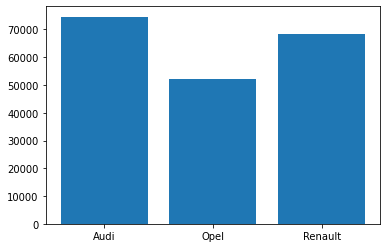

In [98]:
plt.bar(df["Make"] , df["price"]);

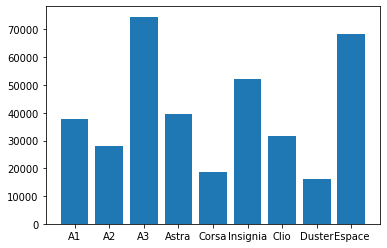

In [99]:
plt.bar(df["Model"] , df["price"]);

In [104]:
df.groupby("body_type").mean().sort_values("price" , ascending= False)

,price,km,prev_owner,hp(kW),Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,CO2 Emission,Gears
body_type,,,,,,,,,,,
Van,30846.632184,41.736095,1.133838,126.071520,4.886010,5.882184,693.671809,4.004219,689.578089,136.433798,6.236842
Convertible,27905.375000,78.974375,1.000000,124.250000,2.375000,4.285714,793.375000,4.000000,519.285714,123.857143,6.750000
Station wagon,18643.281171,49.617988,1.088793,102.370673,4.741688,5.006495,639.644817,3.951254,471.152778,124.927618,6.058406
Sedans,17735.904846,39.855365,1.074365,84.196381,4.705089,4.883262,631.394822,3.746103,317.472577,113.235485,5.938523
Off-Road,17126.160714,54.487821,1.000000,78.875000,4.981818,5.111111,662.672727,4.000000,450.875000,163.177778,5.976744
Transporter,16764.795455,56.447068,1.076923,92.204545,4.896552,4.297619,533.247059,3.955224,507.031746,117.151515,5.779412
Compact,15216.240089,35.274147,1.129762,71.848398,4.360835,4.846076,556.673835,3.682381,197.132686,117.987841,5.649031
Coupe,14222.720000,28.863680,1.066667,79.200000,3.375000,4.750000,469.142857,3.833333,211.333333,114.000000,5.611111
Other,14209.796552,25.850628,1.032787,80.179310,4.842657,4.970149,526.785965,3.941748,290.674528,117.416290,5.643478
